# F1_Car Team Detector_Project by;
### Emre Görkem AĞKURT_19070001042


In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim  
import torchvision.transforms as transforms 
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset,DataLoader) 
from skimage import io
import time

import warnings
warnings.filterwarnings("ignore")

# Adding datas that comes from our custom dataset.


In [2]:
class F1Dataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Initializes the F1Dataset class.
        Parameters:
            csv_file (string): path to the csv file containing the image file names and labels
            root_dir (string): directory with all the images
            transform (callable, optional): optional transform to be applied on a sample
        """
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        """
        Returns the length of the dataset.
        """
        return len(self.annotations)

    def __getitem__(self, index):
        """
        Returns the sample at the given index.
        Parameters:
            index (int): index of the sample to retrieve
        """
        # Load the image and label from the CSV file
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        label = torch.tensor(int(self.annotations.iloc[index, 1]))

        # Apply the transform to the image, if specified
        if self.transform:
            image = self.transform(image)

        return (image, label)


# Preparing the data

In [3]:
# Create an instance of the F1Dataset class
f1_dataset = F1Dataset(
    csv_file="f111.csv",
    root_dir=r"C:\Users\G�rkem\Desktop\customdatas",
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(28*28)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)
# Split the dataset into a training set and a test set
train_set, test_set = torch.utils.data.random_split(f1_dataset, [200, 79])
# Create DataLoaders for the training and test sets
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=True)

# visualize the data


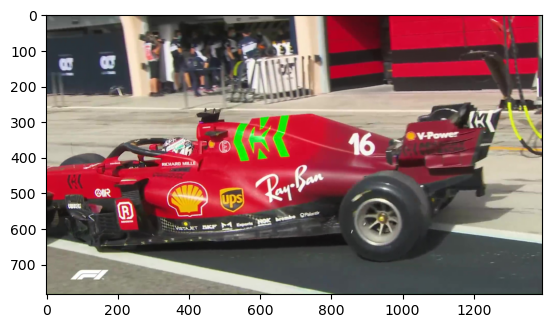

Ferrari
torch.Size([1, 3, 784, 1393])


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load a batch of images and labels from the dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the images
imshow(torchvision.utils.make_grid(images))

# Print the labels
classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]
for label in labels:
    print(classes[label])

# Print the size of the images
print(images.size())


# Uploading the model on different architectures.




In [5]:
def get_model(architecture):
    if architecture == "googlenet":
        model = torchvision.models.googlenet(pretrained=True)
    elif architecture == "resnet50":
        model = torchvision.models.resnet50(pretrained=True)
    elif architecture == "vgg11":
        model = torchvision.models.vgg11(pretrained=True)
    else:
        raise ValueError("Invalid model architecture")
    return model





In [6]:
# Define a loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()

# Accuracy & Trust level of each model trainer architecture.

In [7]:
# Define a list of architectures to try
architectures = ["googlenet", "resnet50", "vgg11"]

num_epochs = 10

# Define a list to store the results
results = []

# Iterate over each architecture
for architecture in architectures:
    # Get the model with the current architecture
    model = get_model(architecture)
    
    # Define an optimizer for the model
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # Train the model
    for epoch in range(num_epochs):
        # Set the model to training mode
        model.train()
        
        # Iterate over the data in the training set
        for images, labels in train_loader:
            # Clear the gradients of the optimizer
            optimizer.zero_grad()
            # Forward pass
            outputs = model(images)
            # Compute the loss
            loss = loss_fn(outputs, labels)
            # Backward pass
            loss.backward()
            # Update the weights
            optimizer.step()

        # Set the model to evaluation mode
        model.eval()
        
        # Initialize the number of correct predictions
        num_correct = 0
        # Iterate over the data in the validation set
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images)
            # Get the predicted class
            _, preds = torch.max(outputs, 1)
            # Update the number of correct predictions
            num_correct += (preds == labels).sum().item()
        
        # Compute the accuracy
        accuracy = num_correct / len(test_loader.dataset)
        # Append the result to the results list
        results.append({"architecture": architecture, "accuracy": accuracy})

# Print the results
for result in results:
    print(f"Model {result['architecture']} has an accuracy of {result['accuracy']:.2f}")
